In [1]:
import numpy as np
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_path = "/content/drive/MyDrive/CIS5810/Final_Project/Train/"
val_path = "/content/drive/MyDrive/CIS5810/Final_Project/Validation/"
test_path = "/content/drive/MyDrive/CIS5810/Final_Project/Test/"

HEIGHT = 150
WIDTH = 150

train_datagen = ImageDataGenerator(rescale=1./255, 
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=0.2)
# print(train_datagen.shape) it is an object

val_datagen = ImageDataGenerator(rescale=1./255,
                                #  width_shift_range=0.2,
                                #  height_shift_range=0.2,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(directory=train_path,
                                          target_size=(HEIGHT,WIDTH),
                                          class_mode="categorical",
                                          batch_size=32
                                          )

val = val_datagen.flow_from_directory(directory=val_path,
                                            target_size=(HEIGHT,WIDTH),
                                            class_mode="categorical",
                                            batch_size=32)
test = test_datagen.flow_from_directory(directory=test_path,
                                            target_size=(HEIGHT,WIDTH),
                                            class_mode="categorical",
                                            batch_size=32)


Found 10000 images belonging to 2 classes.
Found 810 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [4]:
from tensorflow import keras
# from keras.backend import conv2d
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPool2D, AveragePooling2D
from tensorflow.keras import layers

inputshape = (HEIGHT, WIDTH, 3)
model = Sequential()
model.add(layers.Rescaling(1./1, input_shape = inputshape))
# model.add(keras.Input(shape=(150, 150, 3)))
# first convolutional layer, 32 filters and (3,3) kernel, followed a maxpooling layer
model.add(layers.Conv2D(32, 3, padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid'))
# second convolutional layer, 64 filters and (3,3) kernel, followed a maxpooling layer
model.add(layers.Conv2D(64, 3, padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid'))
# third convolutional layer, 64 filters and (3,3) kernel, followed a maxpooling layer
model.add(layers.Conv2D(64, 3, padding='same'))
# model.add(GlobalAveragePooling2D())
model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid'))
# flatten the network to linear layers
model.add(Flatten())
# first linear layer
model.add(Dense(128, activation="relu"))
# second linear layer with relu
model.add(Dense(32,activation='relu'))
# add dropout layer for avoiding overfitting
model.add(Dropout(0.5))
# our output will be binary, either wearing a mask or not
model.add(Dense(2,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        3

In [5]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[['accuracy'], ['mse'], [tf.keras.metrics.AUC()], [tf.keras.metrics.Precision()]])
history = model.fit(train,validation_data = val, steps_per_epoch = len(train)//64, epochs = 35, validation_steps = len(val)//64, verbose = 2)

Epoch 1/35
4/4 - 95s - loss: 0.8523 - accuracy: 0.5703 - mse: 0.2715 - auc: 0.6309 - precision: 0.5703 - 95s/epoch - 24s/step
Epoch 2/35
4/4 - 26s - loss: 0.6809 - accuracy: 0.7031 - mse: 0.2298 - auc: 0.7574 - precision: 0.7031 - 26s/epoch - 6s/step
Epoch 3/35
4/4 - 23s - loss: 0.4539 - accuracy: 0.8359 - mse: 0.1169 - auc: 0.9108 - precision: 0.8359 - 23s/epoch - 6s/step
Epoch 4/35
4/4 - 25s - loss: 0.5091 - accuracy: 0.8672 - mse: 0.1131 - auc: 0.8934 - precision: 0.8672 - 25s/epoch - 6s/step
Epoch 5/35
4/4 - 25s - loss: 0.4835 - accuracy: 0.8047 - mse: 0.1451 - auc: 0.8775 - precision: 0.8047 - 25s/epoch - 6s/step
Epoch 6/35
4/4 - 22s - loss: 0.4940 - accuracy: 0.7969 - mse: 0.1315 - auc: 0.8963 - precision: 0.7969 - 22s/epoch - 6s/step
Epoch 7/35
4/4 - 22s - loss: 0.4281 - accuracy: 0.8516 - mse: 0.1367 - auc: 0.8971 - precision: 0.8516 - 22s/epoch - 5s/step
Epoch 8/35
4/4 - 19s - loss: 0.3532 - accuracy: 0.8984 - mse: 0.1028 - auc: 0.9388 - precision: 0.8984 - 19s/epoch - 5s/step

In [6]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'mse', 'auc', 'precision'])

In [ ]:
model.evaluate(train)
model.evaluate(test)
model.evaluate(val)

In [ ]:
# Metrics

plt.plot(history.history['accuracy'])
plt.title('model val accuracy')
plt.ylabel('val accuracy')
plt.xlabel('epoch')
plt.legend(['val accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val loss'], loc='upper left')
plt.show()

plt.plot(history.history['mse'])
plt.title('model val mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['val mse'], loc='upper left')
plt.show()

plt.plot(history.history['auc'])
plt.title('model acu')
plt.ylabel('acu')
plt.xlabel('epoch')
plt.legend(['val auc'], loc='upper left')
plt.show()

plt.plot(history.history['precision'])
plt.title('model precision score')
plt.ylabel('precision score')
plt.xlabel('epoch')
plt.legend(['val precision score'], loc='upper left')
plt.show()

In [13]:
face_model = cv2.CascadeClassifier('/content/drive/MyDrive/CIS5810/Final_Project/Haa_face_detection/haarcascade_frontalface_default.xml')

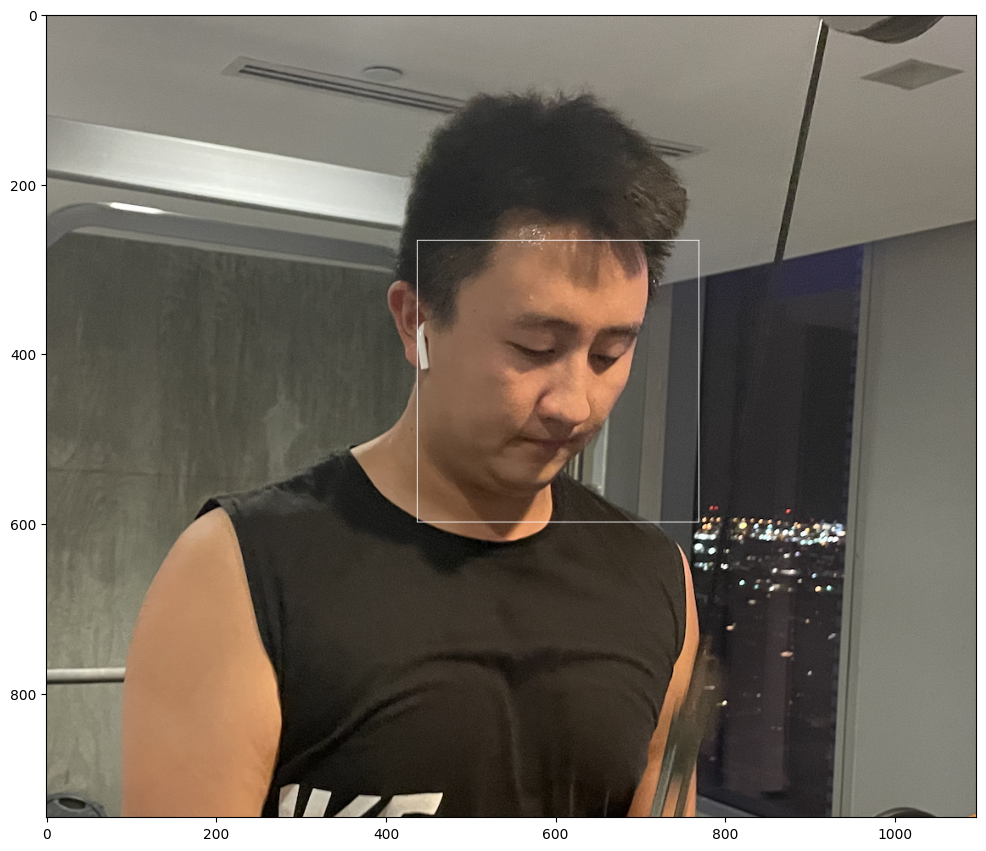

In [14]:
# read the image we want to identify
# img = cv2.imread('/content/drive/MyDrive/CIS5810/Final_Project/images/maksssksksss508.png')

# test with our own image instead of the image given by the kaggle dataset
img = cv2.imread ('/content/drive/MyDrive/CIS5810/Final_Project/ourimage/image1_withoutMask.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE) # convert image to the single channel grayscale image (codec internal conversion).

# detecting faces
faces = face_model.detectMultiScale(img,scaleFactor=1.03, minNeighbors=6) #returns a list of (x,y,w,h) tuples
target_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # the colored image we are using now

#plotting the boxes around the faces
for (x,y,w,h) in faces:
    cv2.rectangle(target_img,(x,y),(x+w,y+h),(255,255,255),1)
plt.figure(figsize=(12,12))
plt.imshow(target_img)

1/1 [==============================] - 1s 500ms/step
[[0.48506224 0.51493776]]
0


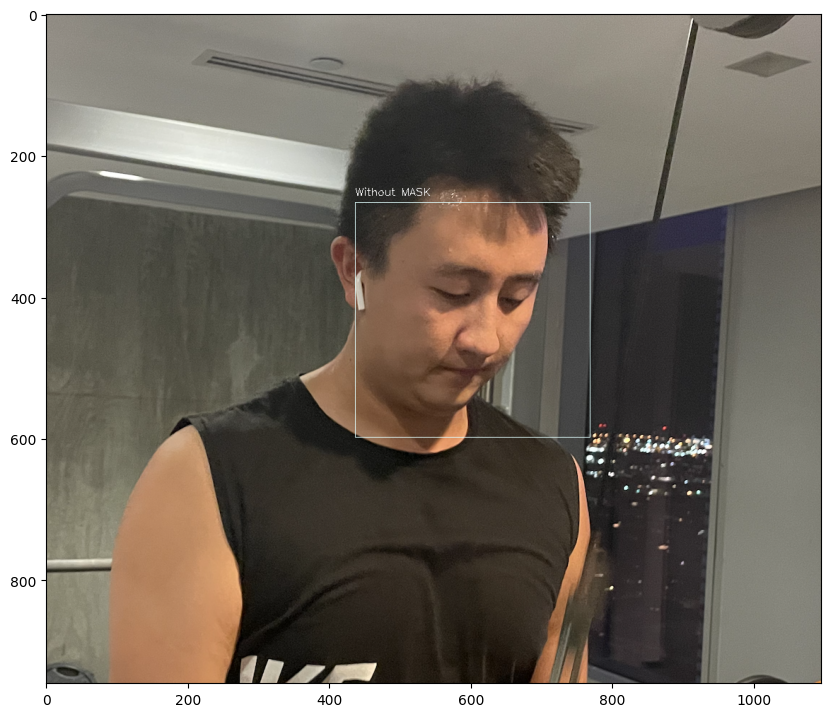

In [16]:
label_dic = {1:'With Mask',0:'Without MASK'}
label = [0 for i in range(len(faces))]

new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
# plt.imshow(new_img)
# iterate through number of faces detected within the given image
for i in range(len(faces)):
    # four point of the box
    (x,y,w,h) = faces[i]
    # crop the face area
    cur_img = new_img[y:y+h,x:x+w]
    cur_img = cv2.resize(cur_img,(150,150))
    cur_img = np.reshape(cur_img,[1,150,150,3])/255.0
    # make prediction
    prediction = model.predict(cur_img)
    print(prediction)
    print(prediction.argmin())
    # visualize prediction with label on each cropped box
    cv2.rectangle(new_img,(x,y),(x+w,y+h),(225,255,255), 1) # mark face area with rect
    cv2.putText(new_img,label_dic[prediction.argmin()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
    
plt.figure(figsize=(10,10))
plt.imshow(new_img)

ValueError: ignored

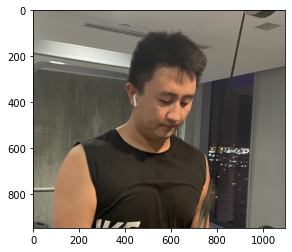

In [ ]:
label_dic = {1:'With Mask',0:'Without MASK'}
label = [0 for i in range(len(faces))]

new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
plt.imshow(new_img)
# iterate through number of faces detected within the given image
for i in range(len(faces)):
    # four point of the box
    (x,y,w,h) = faces[i]
    # crop the face area
    cur_img = new_img[y:y+h,x:x+w]
    cur_img = cv2.resize(cur_img,(150,150))
    cur_img = np.reshape(cur_img,[1,150,150,3])/255.0
    # make prediction
    prediction = model.predict(cur_img)
    print(prediction)
    print(prediction.argmin())
    # visualize prediction with label on each cropped box
    cv2.rectangle(new_img,(x,y),(x+w,y+h),(225,255,255), 1) # mark face area with rect
    cv2.putText(new_img,label_dic[prediction.argmin()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
    
plt.figure(figsize=(10,10))
plt.imshow(new_img)